# Инициализация проекта

In [3563]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import warnings

In [3564]:
data= pd.read_csv('../datasets/moldova_cars_task.csv')

# Исследование исходных данных

<font size=4>
Датасет содержит следующие поля:

- `Make` — марка
- `Model` — модель
- `Year` — год выпуска
- `Style` — тип кузова
- `Distance` — пробег
- `Engine_capacity(cm3)` — объём двигателя в кубических сантиметрах
- `Fuel_type` — тип топлива
- `Transmission` — коробка передач
- `Price(euro)` — цена автомобиля в евро
</font>

In [3565]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41007 entries, 0 to 41006
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Make                  41007 non-null  object 
 1   Model                 40671 non-null  object 
 2   Year                  40771 non-null  float64
 3   Style                 40938 non-null  object 
 4   Distance              40889 non-null  float64
 5   Engine_capacity(cm3)  41007 non-null  float64
 6   Fuel_type             41007 non-null  object 
 7   Transmission          40779 non-null  object 
 8   Price(euro)           41007 non-null  float64
dtypes: float64(4), object(5)
memory usage: 2.8+ MB


In [3566]:
data.head(20)

,Make,Model,Year,Style,Distance,Engine_capacity(cm3),Fuel_type,Transmission,Price(euro)
0,Toyota,Prius,2011.0,Hatchback,195000.0,1800.0,Hybrid,Automatic,7750.0
1,Renault,Grand Scenic,2014.0,Universal,135000.0,1500.0,Diesel,Manual,8550.0
2,Volkswagen,Golf,1998.0,Hatchback,1.0,1400.0,Petrol,Manual,2200.0
3,Renault,Laguna,2012.0,Universal,110000.0,1500.0,Diesel,Manual,6550.0
4,Opel,Astra,2006.0,Universal,200000.0,1600.0,Metan/Propan,Manual,4100.0
5,Mercedes,Vito,2000.0,Microvan,300000.0,2200.0,Diesel,Manual,3490.0
6,Volkswagen,Passat,2010.0,Universal,290000.0,1390.0,Petrol,Manual,5600.0
7,Volkswagen,Touareg,2010.0,SUV,220000.0,2400.0,Diesel,Automatic,17000.0
8,Mercedes,Series (W124),1991.0,Sedan,240000.0,2300.0,Petrol,Manual,2850.0
9,BMW,5 Series,2004.0,Sedan,325000.0,300.0,Diesel,Manual,3400.0


<font size=4><b>Получили следующую характеристику исходных данных:</b>

- в столбце 'Distance' есть подозрительно низкие значения (1.0 и 23.0), которые могут быть ошибками;
- в столбце 'Engine_capacity(cm3)' значение 300.0 для BMW 5 Series выглядит аномально низким;
- пропущенных значений в данных в первых 20 строках не наблюдается
- тип данных столбцов 'Year', 'Distance', 'Engine_capacity(cm3)' и 'Price(euro)' стоит перевести в целочисленный
</font>

<font size=4>Столбцы с неподходящими типами данных:

- изменение типа данных столбца 'Year' с float на int;
- изменение типа данных столбца 'Distance' с float на int;
- изменение типа данных столбца 'Engine_capacity(cm3)' с float на int;
- изменение типа данных столбца 'Price(euro)' с float на int;
</font>

# <font color=4> Выводы и дальнейшие шаги</font>


In [3567]:
data.describe()

,Year,Distance,Engine_capacity(cm3),Price(euro)
count,40771.000000,4.088900e+04,41007.000000,4.100700e+04
mean,2007.979152,4.571171e+05,1853.856732,9.727109e+03
std,8.246369,4.457945e+06,700.364532,5.043926e+04
min,1900.000000,0.000000e+00,0.000000,1.000000e+00
25%,2004.000000,8.700000e+04,1500.000000,3.500000e+03
50%,2009.000000,1.680000e+05,1800.000000,6.600000e+03
75%,2014.000000,2.300000e+05,2000.000000,1.215000e+04
max,2021.000000,1.000000e+08,9999.000000,1.000000e+07


<b>Вывод:</b>
    
- Год выпуска автомобилей варьируется от 1900 до 2021, средний год выпуска — 2007
- Пробег автомобилей имеет значительный разброс: минимальное значение — 0 км, максимальное — 100 млн км, что может указывать на выбросы или ошибки в данных
- Объем двигателя в среднем составляет 1900 см³, но есть аномально низкое значение (300.0 для BMW 5 Series).
- Цены на автомобили варьируются от 1550 до 17000 евро, средняя цена — 7788.95 евро.

## Обработка пропущенных значений

In [ ]:
(data.isna().sum()/data.shape[0]*100).sort_values(ascending=False)

Model                   0.819372
Year                    0.575511
Transmission            0.556003
Distance                0.287756
Style                   0.168264
Make                    0.000000
Engine_capacity(cm3)    0.000000
Fuel_type               0.000000
Price(euro)             0.000000
dtype: float64

<font size=4><b>Недостающее значение данных в следующих столбцах:</b>

- Model (0.82%)
- Year (0.58%)
- Transmission (0.56%)
- Distance (0.29%)
- Style (0.17%)</font>

<font size=4><b>Предположения для заполнения пропущенного значения:</b>

- Model: Заполнить пропущенные значения на основе наиболее часто встречающихся моделей для каждого производителя
- Year: Заполнить пропущенные значения медианным годом выпуска для каждой модели или производителя.
- Transmission: Заполнить пропуски наиболее часто встречающимся типом трансмиссии для каждой модели или производителя.
- Distance: Заполнить пропущенные значения медианным пробегом для автомобилей с аналогичными характеристиками.
- Style: Заполнить пропущенные значения наиболее часто встречающимся стилем кузова для каждой модели или производителя.


In [3569]:
data

,Make,Model,Year,Style,Distance,Engine_capacity(cm3),Fuel_type,Transmission,Price(euro)
0,Toyota,Prius,2011.0,Hatchback,195000.0,1800.0,Hybrid,Automatic,7750.0
1,Renault,Grand Scenic,2014.0,Universal,135000.0,1500.0,Diesel,Manual,8550.0
2,Volkswagen,Golf,1998.0,Hatchback,1.0,1400.0,Petrol,Manual,2200.0
3,Renault,Laguna,2012.0,Universal,110000.0,1500.0,Diesel,Manual,6550.0
4,Opel,Astra,2006.0,Universal,200000.0,1600.0,Metan/Propan,Manual,4100.0
...,...,...,...,...,...,...,...,...,...
41002,Dacia,NaN,2015.0,Universal,89000.0,1500.0,Diesel,Manual,7000.0
41003,Renault,Modus,2009.0,Hatchback,225.0,1500.0,Diesel,Manual,4500.0
41004,Mercedes,E Class,2016.0,Sedan,50000.0,1950.0,Diesel,Automatic,29500.0
41005,Mazda,6,2006.0,Combi,370000.0,2000.0,Diesel,Manual,4000.0


In [ ]:
f = lambda x: x.mode().iat[0] if x.notna().any() else np.nan
group_model = data.groupby('Make')['Model'].transform(f)
data['Model'] = data['Model'].fillna(group_model)
(data.isna().sum()/data.shape[0]*100).sort_values(ascending=False)

Year                    0.575511
Transmission            0.556003
Distance                0.287756
Style                   0.168264
Make                    0.000000
Model                   0.000000
Engine_capacity(cm3)    0.000000
Fuel_type               0.000000
Price(euro)             0.000000
dtype: float64

In [ ]:
group_year = data.groupby('Model')['Year'].transform('median')
data['Year'] = data['Year'].fillna(group_year)
(data.isna().sum()/data.shape[0]*100).sort_values(ascending=False)

Transmission            0.556003
Distance                0.287756
Style                   0.168264
Make                    0.000000
Year                    0.000000
Model                   0.000000
Engine_capacity(cm3)    0.000000
Fuel_type               0.000000
Price(euro)             0.000000
dtype: float64

In [ ]:
group_transmission = data.groupby('Model')['Transmission'].transform(f)
data ['Transmission'] = data ['Transmission'].fillna(group_model)
(data.isna().sum()/data.shape[0]*100).sort_values(ascending=False)

Distance                0.287756
Style                   0.168264
Make                    0.000000
Year                    0.000000
Model                   0.000000
Engine_capacity(cm3)    0.000000
Fuel_type               0.000000
Transmission            0.000000
Price(euro)             0.000000
dtype: float64

In [ ]:
group_distance = data.groupby('Model')['Distance'].transform('median')
data['Distance'] = data['Distance'].fillna(group_distance)
(data.isna().sum()/data.shape[0]*100).sort_values(ascending=False)

Style                   0.168264
Make                    0.000000
Model                   0.000000
Year                    0.000000
Distance                0.000000
Engine_capacity(cm3)    0.000000
Fuel_type               0.000000
Transmission            0.000000
Price(euro)             0.000000
dtype: float64

In [ ]:
group_style = data.groupby('Model')['Style'].transform(f)
data['Style'] = data['Style'].fillna(group_style)
(data.isna().sum()/data.shape[0]*100).sort_values(ascending=False)

Make                    0.0
Model                   0.0
Year                    0.0
Style                   0.0
Distance                0.0
Engine_capacity(cm3)    0.0
Fuel_type               0.0
Transmission            0.0
Price(euro)             0.0
dtype: float64

In [3575]:
data

,Make,Model,Year,Style,Distance,Engine_capacity(cm3),Fuel_type,Transmission,Price(euro)
0,Toyota,Prius,2011.0,Hatchback,195000.0,1800.0,Hybrid,Automatic,7750.0
1,Renault,Grand Scenic,2014.0,Universal,135000.0,1500.0,Diesel,Manual,8550.0
2,Volkswagen,Golf,1998.0,Hatchback,1.0,1400.0,Petrol,Manual,2200.0
3,Renault,Laguna,2012.0,Universal,110000.0,1500.0,Diesel,Manual,6550.0
4,Opel,Astra,2006.0,Universal,200000.0,1600.0,Metan/Propan,Manual,4100.0
...,...,...,...,...,...,...,...,...,...
41002,Dacia,Logan,2015.0,Universal,89000.0,1500.0,Diesel,Manual,7000.0
41003,Renault,Modus,2009.0,Hatchback,225.0,1500.0,Diesel,Manual,4500.0
41004,Mercedes,E Class,2016.0,Sedan,50000.0,1950.0,Diesel,Automatic,29500.0
41005,Mazda,6,2006.0,Combi,370000.0,2000.0,Diesel,Manual,4000.0


## Коррекция типов данных

In [3576]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41007 entries, 0 to 41006
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Make                  41007 non-null  object 
 1   Model                 41007 non-null  object 
 2   Year                  41007 non-null  float64
 3   Style                 41007 non-null  object 
 4   Distance              41007 non-null  float64
 5   Engine_capacity(cm3)  41007 non-null  float64
 6   Fuel_type             41007 non-null  object 
 7   Transmission          41007 non-null  object 
 8   Price(euro)           41007 non-null  float64
dtypes: float64(4), object(5)
memory usage: 2.8+ MB


In [3577]:
# Изменить float на int
data['Year'] = data['Year'].astype(int)
data['Engine_capacity(cm3)'] = data['Engine_capacity(cm3)'].astype(int)
data['Distance'] = data['Distance'].astype(int)
data['Price(euro)'] = data['Price(euro)'].astype(int)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41007 entries, 0 to 41006
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Make                  41007 non-null  object
 1   Model                 41007 non-null  object
 2   Year                  41007 non-null  int64 
 3   Style                 41007 non-null  object
 4   Distance              41007 non-null  int64 
 5   Engine_capacity(cm3)  41007 non-null  int64 
 6   Fuel_type             41007 non-null  object
 7   Transmission          41007 non-null  object
 8   Price(euro)           41007 non-null  int64 
dtypes: int64(4), object(5)
memory usage: 2.8+ MB


In [3578]:
data

,Make,Model,Year,Style,Distance,Engine_capacity(cm3),Fuel_type,Transmission,Price(euro)
0,Toyota,Prius,2011,Hatchback,195000,1800,Hybrid,Automatic,7750
1,Renault,Grand Scenic,2014,Universal,135000,1500,Diesel,Manual,8550
2,Volkswagen,Golf,1998,Hatchback,1,1400,Petrol,Manual,2200
3,Renault,Laguna,2012,Universal,110000,1500,Diesel,Manual,6550
4,Opel,Astra,2006,Universal,200000,1600,Metan/Propan,Manual,4100
...,...,...,...,...,...,...,...,...,...
41002,Dacia,Logan,2015,Universal,89000,1500,Diesel,Manual,7000
41003,Renault,Modus,2009,Hatchback,225,1500,Diesel,Manual,4500
41004,Mercedes,E Class,2016,Sedan,50000,1950,Diesel,Automatic,29500
41005,Mazda,6,2006,Combi,370000,2000,Diesel,Manual,4000


## Обогащение данных

In [3579]:
# Возраст автомобиля
data['Vehicle_age'] = (2025 - data['Year']) + 1
data['Vehicle_age'].value_counts()

Vehicle_age
14     2504
15     2502
11     2298
10     2290
13     2247
       ... 
78        1
111       1
58        1
65        1
72        1
Name: count, Length: 75, dtype: int64

In [3580]:
# Среднегодовой пробег
data['Avg_mileage'] = (data['Distance'] / data['Vehicle_age']).round().astype(int)
data['Avg_mileage'].value_counts()

Avg_mileage
0         1938
10000      480
15000      247
5000       228
12500      228
          ... 
99259        1
4302         1
653595       1
79365        1
8290         1
Name: count, Length: 9744, dtype: int64

In [3581]:
# Проверьть, есть ли какое-либо значение NaN
data['Avg_mileage'].isna().sum()

np.int64(0)

In [3582]:
data['Vehicle_age'].isna().sum()

np.int64(0)

### **Проверка "очищенных" данных**

In [3583]:
# Проверка дубликатов
data.duplicated().sum()

np.int64(3625)

In [3584]:
data = data.drop_duplicates()
data.duplicated().sum()

np.int64(0)

In [3585]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 37382 entries, 0 to 41006
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Make                  37382 non-null  object
 1   Model                 37382 non-null  object
 2   Year                  37382 non-null  int64 
 3   Style                 37382 non-null  object
 4   Distance              37382 non-null  int64 
 5   Engine_capacity(cm3)  37382 non-null  int64 
 6   Fuel_type             37382 non-null  object
 7   Transmission          37382 non-null  object
 8   Price(euro)           37382 non-null  int64 
 9   Vehicle_age           37382 non-null  int64 
 10  Avg_mileage           37382 non-null  int64 
dtypes: int64(6), object(5)
memory usage: 3.4+ MB


In [3586]:
data.head(10)

,Make,Model,Year,Style,Distance,Engine_capacity(cm3),Fuel_type,Transmission,Price(euro),Vehicle_age,Avg_mileage
0,Toyota,Prius,2011,Hatchback,195000,1800,Hybrid,Automatic,7750,15,13000
1,Renault,Grand Scenic,2014,Universal,135000,1500,Diesel,Manual,8550,12,11250
2,Volkswagen,Golf,1998,Hatchback,1,1400,Petrol,Manual,2200,28,0
3,Renault,Laguna,2012,Universal,110000,1500,Diesel,Manual,6550,14,7857
4,Opel,Astra,2006,Universal,200000,1600,Metan/Propan,Manual,4100,20,10000
5,Mercedes,Vito,2000,Microvan,300000,2200,Diesel,Manual,3490,26,11538
6,Volkswagen,Passat,2010,Universal,290000,1390,Petrol,Manual,5600,16,18125
7,Volkswagen,Touareg,2010,SUV,220000,2400,Diesel,Automatic,17000,16,13750
8,Mercedes,Series (W124),1991,Sedan,240000,2300,Petrol,Manual,2850,35,6857
9,BMW,5 Series,2004,Sedan,325000,300,Diesel,Manual,3400,22,14773


# EDA

In [3587]:
data.describe()[['Year', 'Distance', 'Engine_capacity(cm3)', 'Price(euro)', 'Vehicle_age',  'Avg_mileage']]

,Year,Distance,Engine_capacity(cm3),Price(euro),Vehicle_age,Avg_mileage
count,37382.000000,3.738200e+04,37382.000000,3.738200e+04,37382.000000,3.738200e+04
mean,2007.721577,4.745638e+05,1858.774544,9.572512e+03,18.278423,2.228498e+04
std,8.282408,4.583987e+06,707.191757,5.275158e+04,8.282408,2.160288e+05
min,1900.000000,0.000000e+00,0.000000,1.000000e+00,5.000000,0.000000e+00
25%,2004.000000,9.000000e+04,1499.000000,3.333000e+03,12.000000,6.100000e+03
50%,2009.000000,1.700000e+05,1800.000000,6.499000e+03,17.000000,1.038500e+04
75%,2014.000000,2.300000e+05,2000.000000,1.180000e+04,22.000000,1.350000e+04
max,2021.000000,1.000000e+08,9999.000000,1.000000e+07,126.000000,2.000000e+07


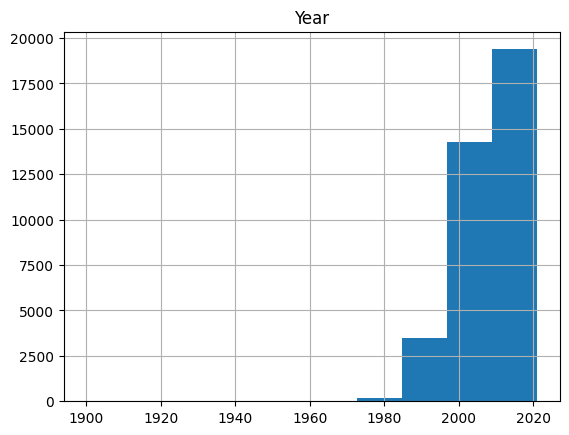

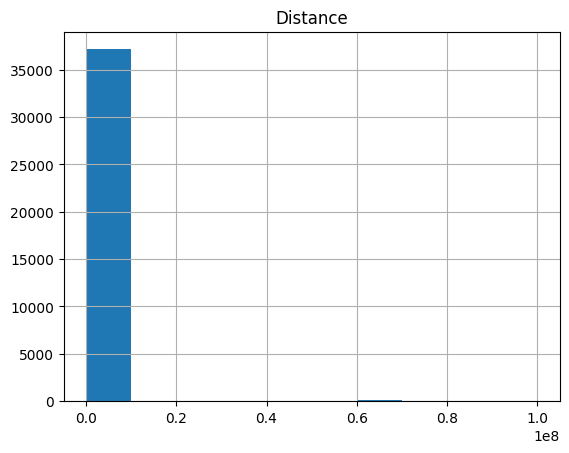

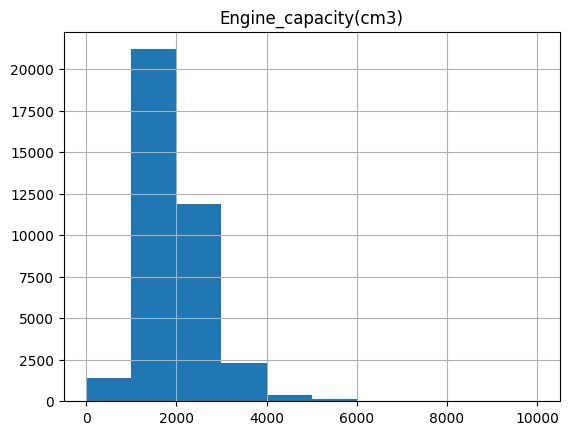

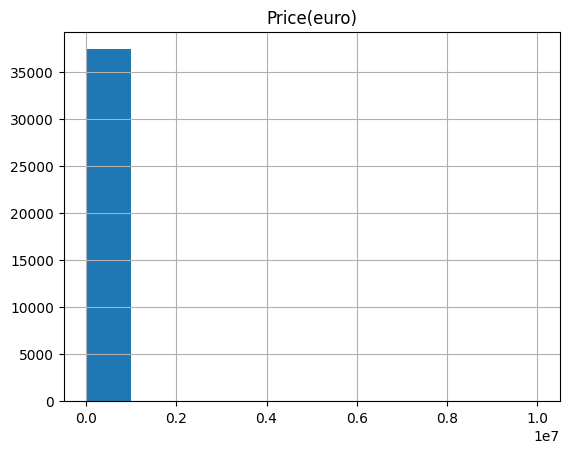

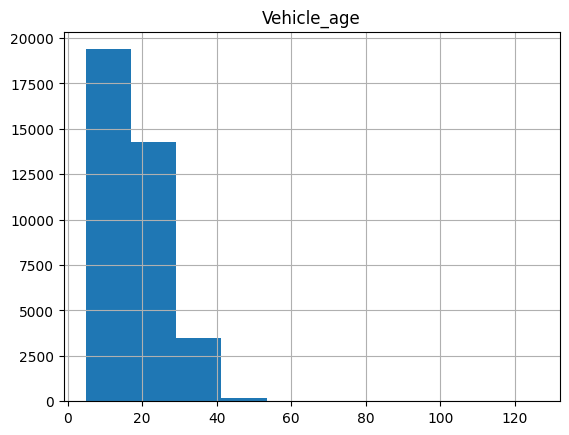

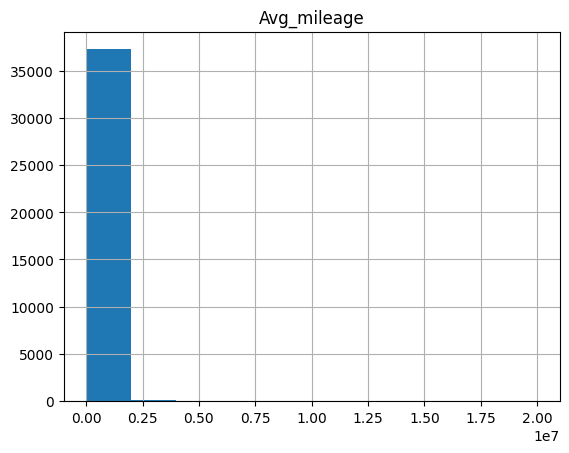

In [3588]:
columns = ['Year', 'Distance', 'Engine_capacity(cm3)', 'Price(euro)', 'Vehicle_age',  'Avg_mileage']

for column in columns:
    data.hist(column)

## Изучение и обработка выбросов

In [3589]:
outlier = data[columns]
outlier

,Year,Distance,Engine_capacity(cm3),Price(euro),Vehicle_age,Avg_mileage
0,2011,195000,1800,7750,15,13000
1,2014,135000,1500,8550,12,11250
2,1998,1,1400,2200,28,0
3,2012,110000,1500,6550,14,7857
4,2006,200000,1600,4100,20,10000
...,...,...,...,...,...,...
41001,2002,225000,1800,4400,24,9375
41002,2015,89000,1500,7000,11,8091
41003,2009,225,1500,4500,17,13
41005,2006,370000,2000,4000,20,18500


In [3590]:
# Определить нижние пределы для выбросов
Q1 = outlier.quantile(0.25)
Q1

Year                     2004.0
Distance                90000.0
Engine_capacity(cm3)     1499.0
Price(euro)              3333.0
Vehicle_age                12.0
Avg_mileage              6100.0
Name: 0.25, dtype: float64

In [3591]:
# Определить верхние пределы выбросов
Q3 = outlier.quantile(0.75)
Q3

Year                      2014.0
Distance                230000.0
Engine_capacity(cm3)      2000.0
Price(euro)              11800.0
Vehicle_age                 22.0
Avg_mileage              13500.0
Name: 0.75, dtype: float64

In [3592]:
# IQR-оценки
IQR = Q3-Q1
# Отфильтрованные данные, из которых удалены выбросы
data_filtered = outlier[~((outlier < (Q1 - 1.5 * IQR)) |(outlier > (Q3 + 1.5 * IQR))).any(axis=1)]
data_filtered

,Year,Distance,Engine_capacity(cm3),Price(euro),Vehicle_age,Avg_mileage
0,2011,195000,1800,7750,15,13000
1,2014,135000,1500,8550,12,11250
2,1998,1,1400,2200,28,0
3,2012,110000,1500,6550,14,7857
4,2006,200000,1600,4100,20,10000
...,...,...,...,...,...,...
41001,2002,225000,1800,4400,24,9375
41002,2015,89000,1500,7000,11,8091
41003,2009,225,1500,4500,17,13
41005,2006,370000,2000,4000,20,18500


In [3593]:
# Копирование индексов
index_list = list(data_filtered.index.values)

In [3594]:
# Хранить данные без выбросов в отдельном DataFrame.
data_filtered = data[data.index.isin(index_list)]
data_filtered

,Make,Model,Year,Style,Distance,Engine_capacity(cm3),Fuel_type,Transmission,Price(euro),Vehicle_age,Avg_mileage
0,Toyota,Prius,2011,Hatchback,195000,1800,Hybrid,Automatic,7750,15,13000
1,Renault,Grand Scenic,2014,Universal,135000,1500,Diesel,Manual,8550,12,11250
2,Volkswagen,Golf,1998,Hatchback,1,1400,Petrol,Manual,2200,28,0
3,Renault,Laguna,2012,Universal,110000,1500,Diesel,Manual,6550,14,7857
4,Opel,Astra,2006,Universal,200000,1600,Metan/Propan,Manual,4100,20,10000
...,...,...,...,...,...,...,...,...,...,...,...
41001,Land Rover,Freelander,2002,Crossover,225000,1800,Metan/Propan,Manual,4400,24,9375
41002,Dacia,Logan,2015,Universal,89000,1500,Diesel,Manual,7000,11,8091
41003,Renault,Modus,2009,Hatchback,225,1500,Diesel,Manual,4500,17,13
41005,Mazda,6,2006,Combi,370000,2000,Diesel,Manual,4000,20,18500


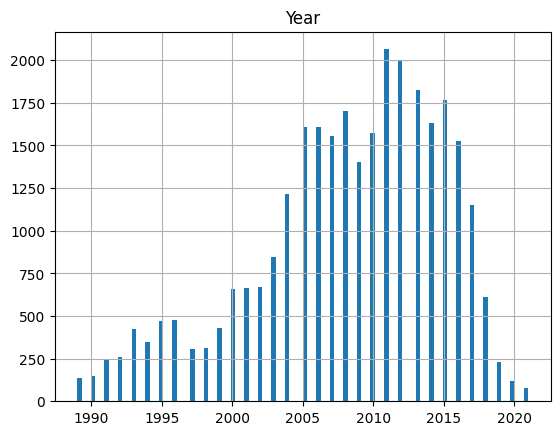

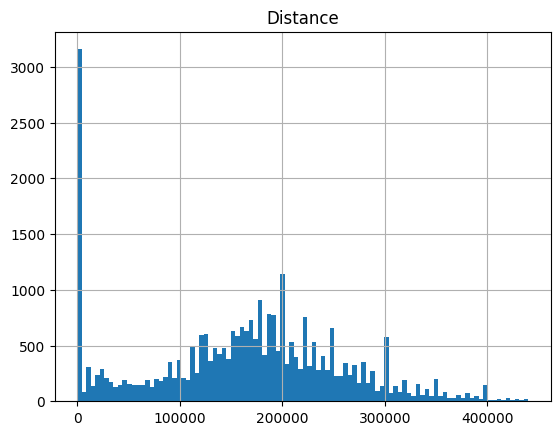

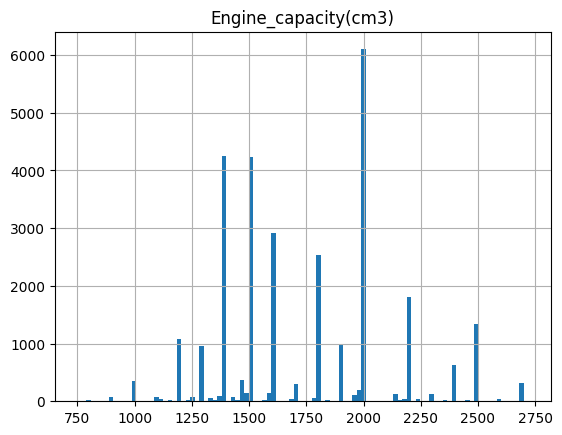

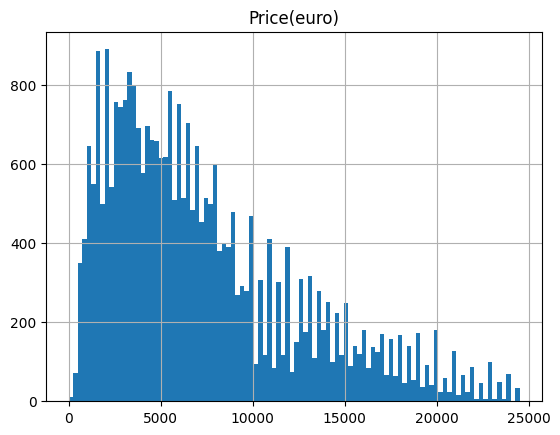

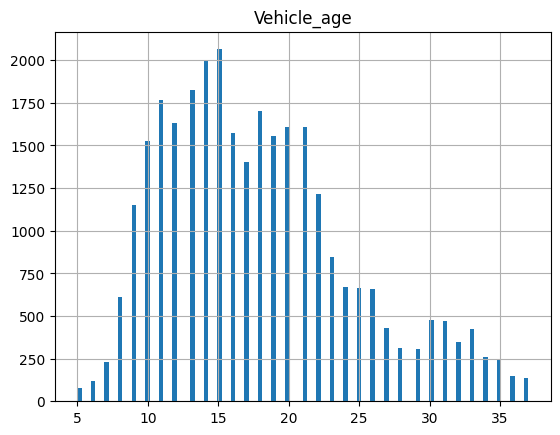

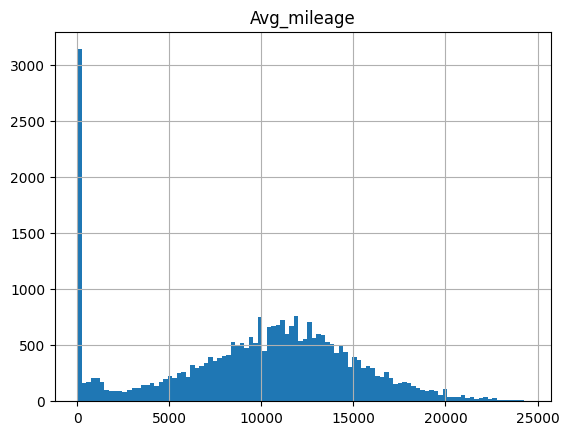

In [3595]:
# создать гистограмму с отфильтрованным выбросом
filtered_outlier = data_filtered[columns]

for col in filtered_outlier:
    data_filtered.hist(col, bins=100)

## Изучение основных параметров без выбросов

[[<Axes: title={'center': 'Year'}>]]
[[<Axes: title={'center': 'Year'}>]]


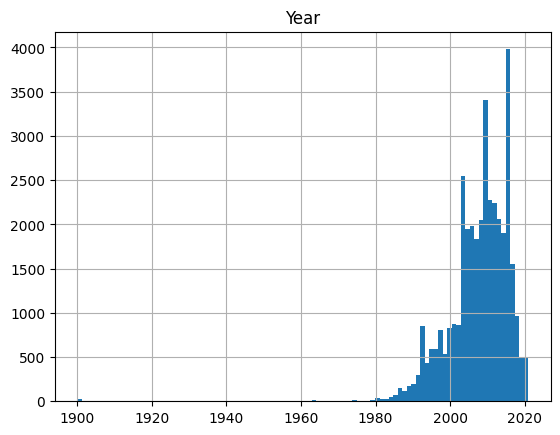

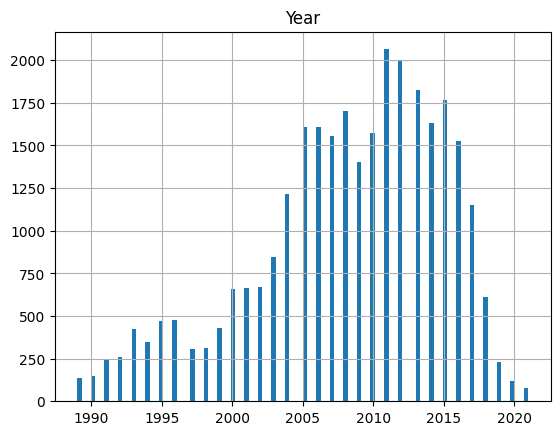

In [ ]:
print (data.hist('Year', bins=100))
print (data_filtered.hist('Year', bins=100))

[[<Axes: title={'center': 'Distance'}>]]
[[<Axes: title={'center': 'Distance'}>]]


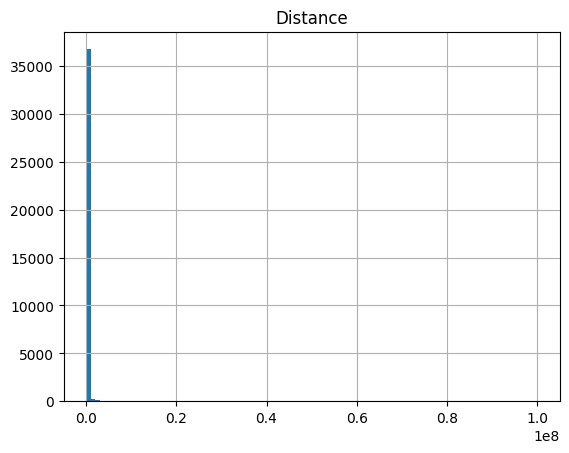

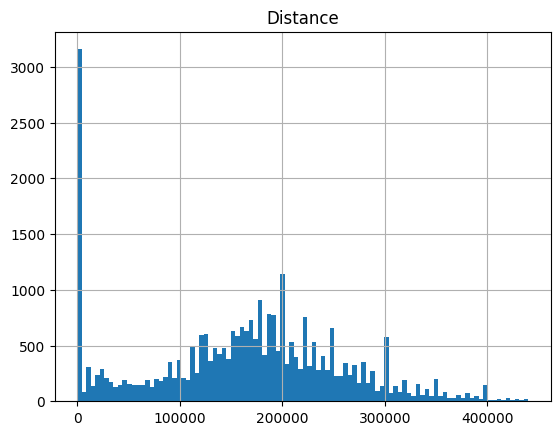

In [ ]:
print (data.hist('Distance', bins=100))
print (data_filtered.hist('Distance', bins=100))

[[<Axes: title={'center': 'Engine_capacity(cm3)'}>]]
[[<Axes: title={'center': 'Engine_capacity(cm3)'}>]]


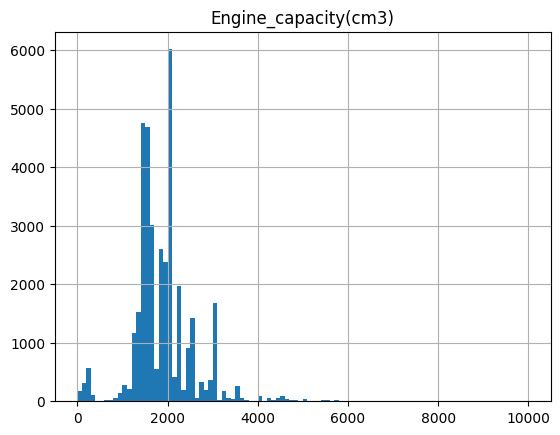

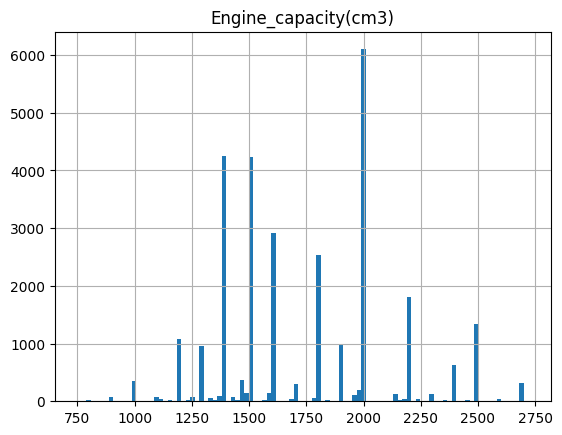

In [ ]:
print (data.hist('Engine_capacity(cm3)', bins=100))
print (data_filtered.hist('Engine_capacity(cm3)', bins=100))

[[<Axes: title={'center': 'Price(euro)'}>]]
[[<Axes: title={'center': 'Price(euro)'}>]]


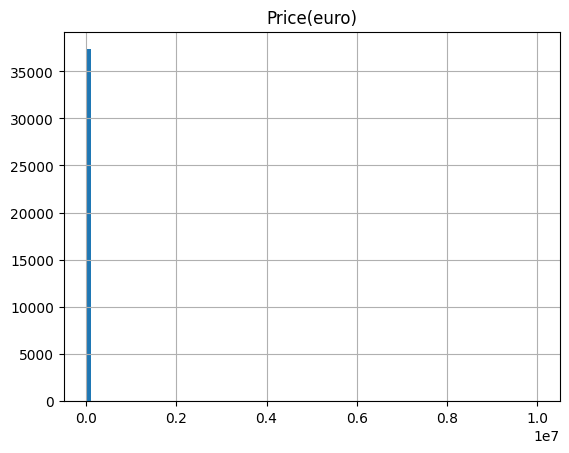

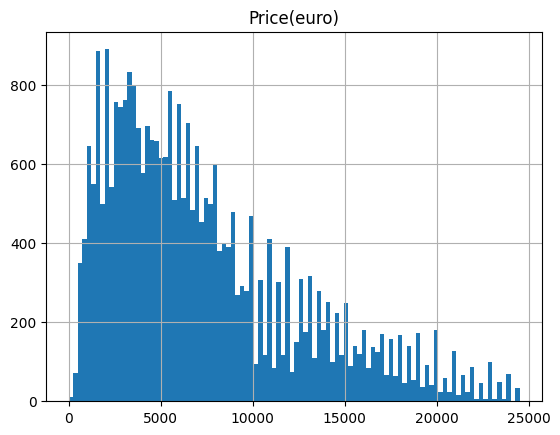

In [ ]:
print (data.hist('Price(euro)', bins=100))
print (data_filtered.hist('Price(euro)', bins=100))

[[<Axes: title={'center': 'Vehicle_age'}>]]
[[<Axes: title={'center': 'Vehicle_age'}>]]


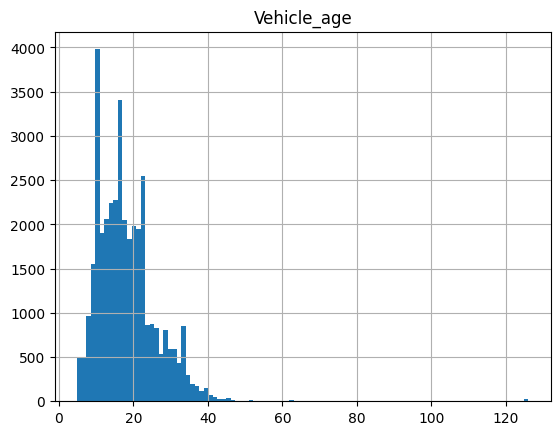

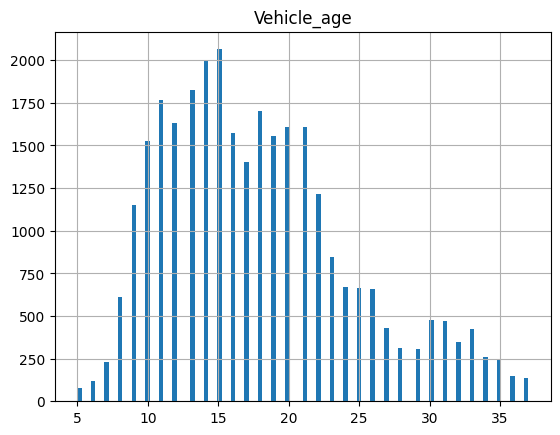

In [3600]:
print (data.hist('Vehicle_age', bins=100))
print (data_filtered.hist('Vehicle_age', bins=100))

[[<Axes: title={'center': 'Avg_mileage'}>]]
[[<Axes: title={'center': 'Avg_mileage'}>]]


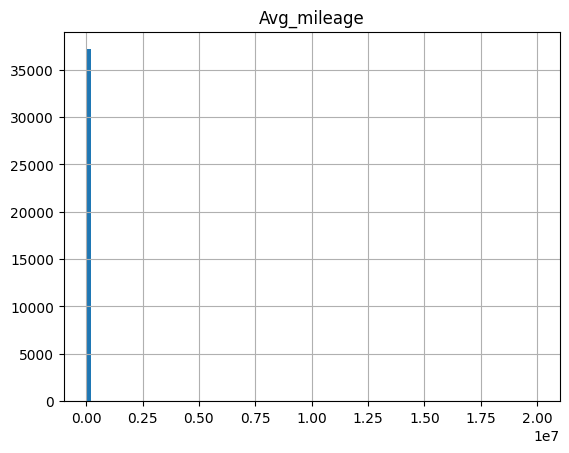

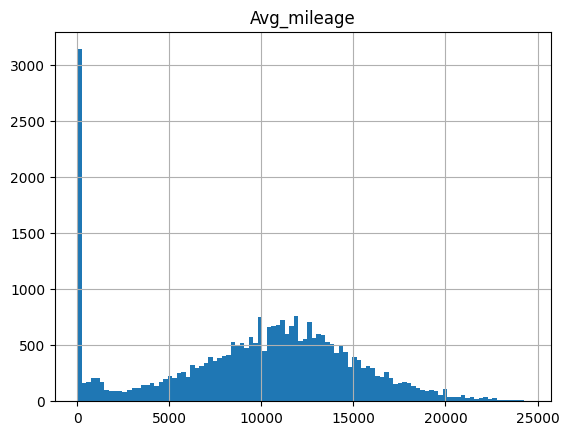

In [3601]:
print (data.hist('Avg_mileage', bins=100))
print (data_filtered.hist('Avg_mileage', bins=100))

## Возраст автомобиля

In [ ]:
mean_age = data_filtered['Vehicle_age'].mean()
median_age = data_filtered['Vehicle_age'].median()
print(f"Средний возраст: {mean_age:.1f} лет")
print(f"Медианный возраст: {median_age} лет")

Средний возраст: 17.9 лет
Медианный возраст: 17.0 лет


In [ ]:
data_filtered['Vehicle_age'].describe()

count    30048.000000
mean        17.867346
std          6.749223
min          5.000000
25%         13.000000
50%         17.000000
75%         22.000000
max         37.000000
Name: Vehicle_age, dtype: float64

array([[<Axes: title={'center': 'Vehicle_age'}>]], dtype=object)

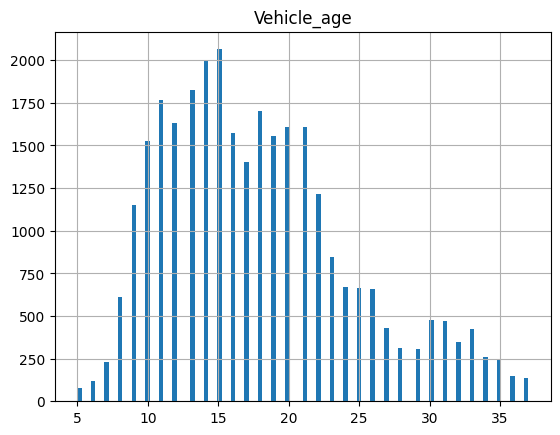

In [3604]:
data_filtered.hist('Vehicle_age', bins=100)

**Заключение:**
<br>
- Средний возраст автомобилей — 17.9 лет, медиана — 17 лет. Гистограмма показывает ассиметрию вправо из-за того, что среднее значение выше медианы.
- Минимальный возраст — 5 лет, максимальный — 37 лет, это очень аномально большой возраст для современных моделей.

## Средняя цена по типам кузова

In [3605]:
avg_price_style = data_filtered.pivot_table(index='Style', values='Price(euro)', aggfunc='mean')
avg_price_style.sort_values(by='Price(euro)', ascending=False)

,Price(euro)
Style,
Crossover,12486.282576
Pickup,11241.623529
SUV,10979.127767
Roadster,8151.476190
Sedan,7409.108252
Cabriolet,6761.556604
Microvan,6546.002347
Universal,6056.452596
Coupe,5999.735234


In [3606]:
ads_style = data_filtered['Style'].value_counts().reset_index()
ads_style.columns = ['Style', 'Count']
ads_style = ads_style.sort_values(by='Count', ascending=False)
ads_style

,Style,Count
0,Sedan,8665
1,Universal,6202
2,Hatchback,5610
3,Crossover,3323
4,Minivan,2781
5,SUV,1988
6,Coupe,491
7,Microvan,426
8,Combi,350
9,Cabriolet,106


<Axes: xlabel='Style'>

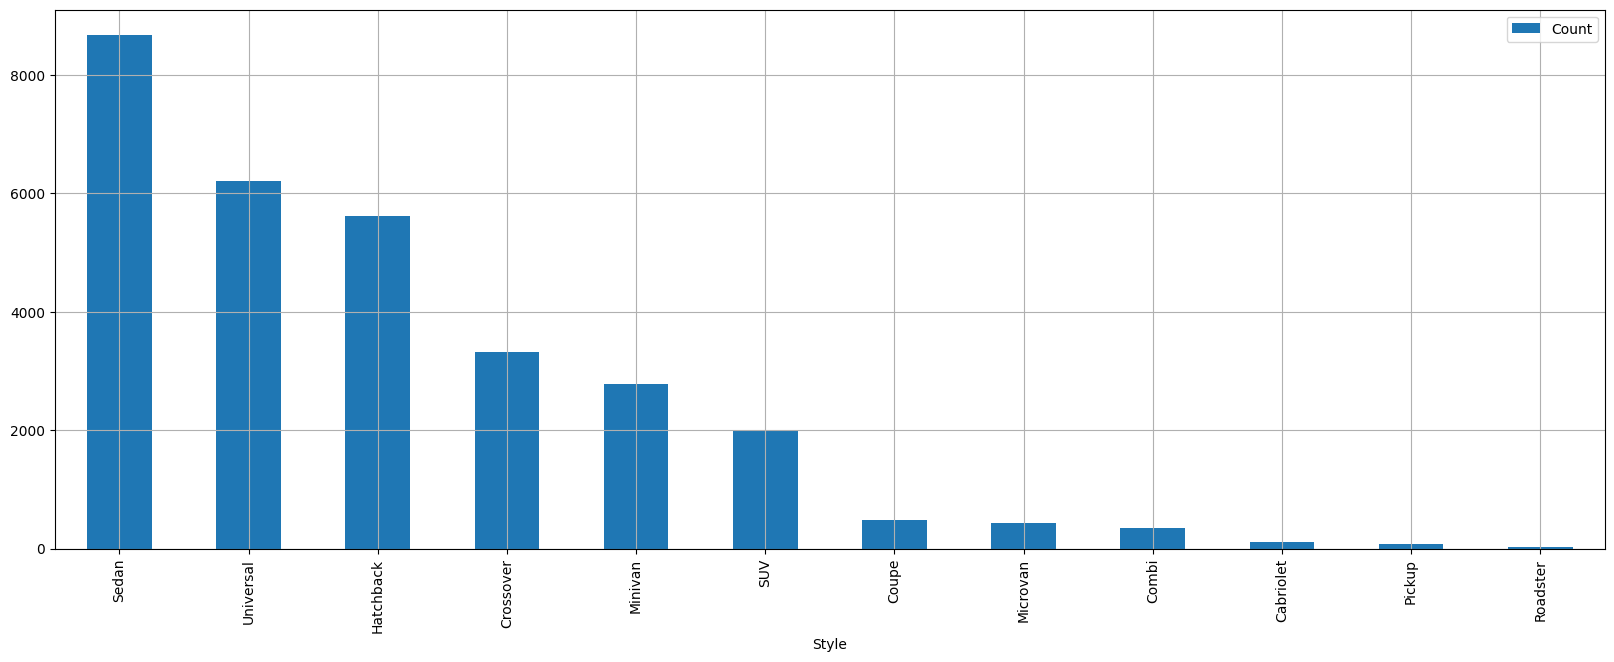

In [3607]:
ads_style.plot(grid=True, figsize=(20, 7), kind = 'bar', x='Style',y='Count')

**Заключение:**

- Самые дорогие типы кузова: Crossover, Pickup, SUV, самые дешевые — Minivan, Hatchback, Combi.

- Два самых популярных типа:
     - Sedan
     - Universal

## Ценовые факторы

Возраст автомобиля и цена

In [3608]:
# Отфильтровано 2 популярных типа ТС
sedan = data_filtered.query('Style == "Sedan"')
universal = data_filtered.query('Style == "Universal"')

Text(0.5, 1.0, 'Universal')

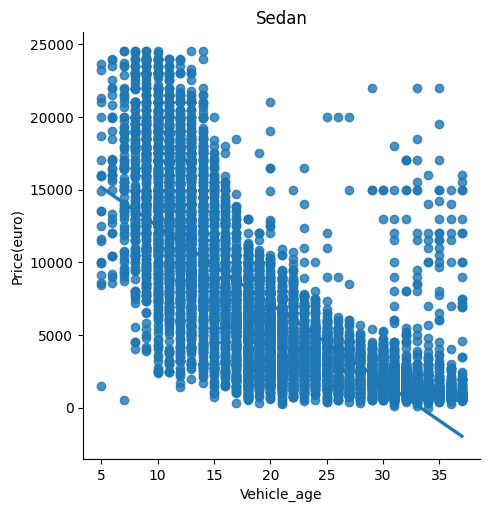

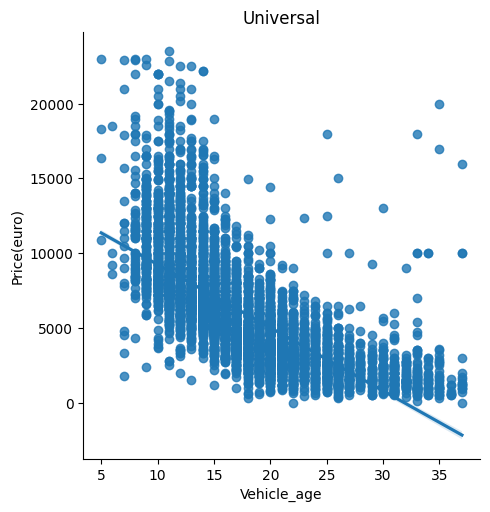

In [3609]:
sns.lmplot(x="Vehicle_age", y="Price(euro)", data=sedan)
plt.title('Sedan')
sns.lmplot(x="Vehicle_age", y="Price(euro)", data=universal)
plt.title('Universal')

In [3610]:
# вычисление корелляции
age_sedan = sedan[['Vehicle_age','Price(euro)']]
corr_sedan = age_sedan.corr()
age_universal = sedan[['Vehicle_age','Price(euro)']]
corr_universal = age_universal.corr()

In [3611]:
round(corr_sedan,3)

,Vehicle_age,Price(euro)
Vehicle_age,1.000,-0.729
Price(euro),-0.729,1.000


In [3612]:
round(corr_universal,3)

,Vehicle_age,Price(euro)
Vehicle_age,1.000,-0.729
Price(euro),-0.729,1.000


**Заключение** :
<br>
Возраст ТС для обоих типов повлиял на его стоимость. Увеличение возраста ТС приведет к снижению цены. Коэффициент корреляции отрицательный означает, что возраст уменьшается с ростом цены.

Пробег и цена

Text(0.5, 1.0, 'Universal')

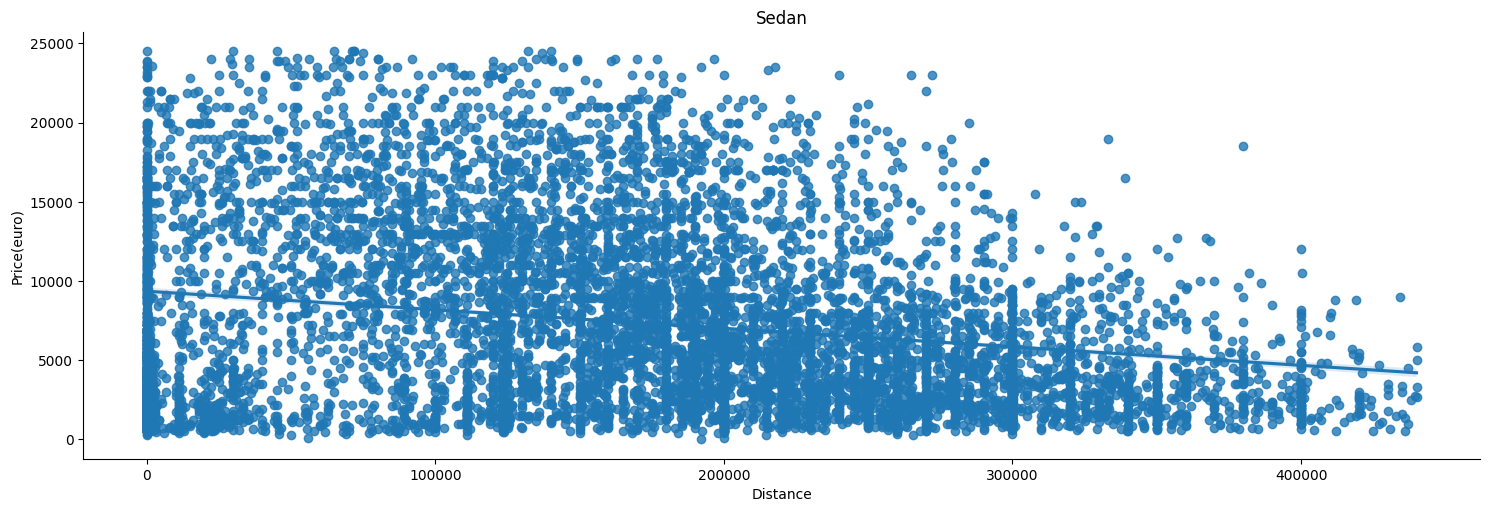

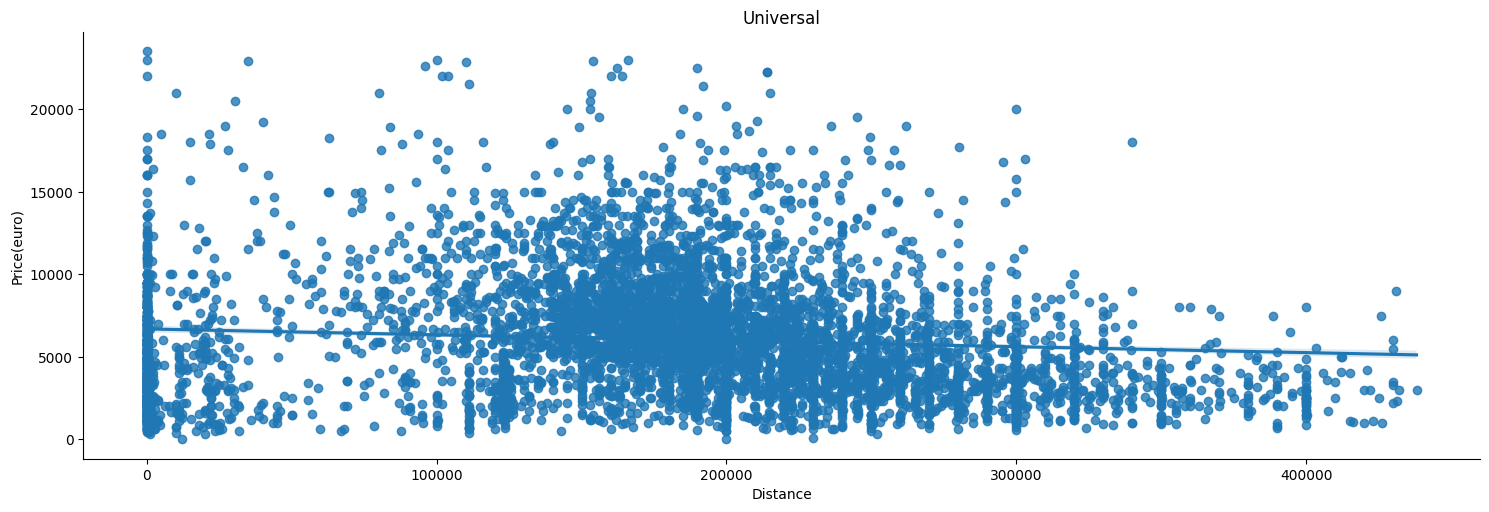

In [3613]:
sns.lmplot(x="Distance", y="Price(euro)", data=sedan, height = 5, aspect =3)
plt.title('Sedan')
sns.lmplot(x="Distance", y="Price(euro)", data=universal, height = 5, aspect =3)
plt.title('Universal')

In [3614]:
# вычисление корелляции
distance_sedan= sedan[['Distance','Price(euro)']]
distance_sedan_corr = distance_sedan.corr()
distance_universal = universal[['Distance','Price(euro)']]
distance_universal_corr = distance_universal.corr()

In [3615]:
round(distance_sedan_corr,3)

,Distance,Price(euro)
Distance,1.000,-0.218
Price(euro),-0.218,1.000


In [3616]:
round(distance_universal_corr,3)

,Distance,Price(euro)
Distance,1.000,-0.091
Price(euro),-0.091,1.000


**Заключение:**
<br>Пробег влияет на стоимость ТС. Увеличение пробега ТС приведет к увеличению цены. Коэффициент корреляции отрицательный, означает, что пробег уменьшается с ростом цены.

Трансмиссия и цена

In [3617]:
sedan_trans = sedan['Transmission'].value_counts()
sedan_trans_valid = sedan_trans[sedan_trans >= 50].index
sedan_filtered = sedan[sedan['Transmission'].isin(sedan_trans_valid)]
sedan_filtered.Transmission.value_counts()

Transmission
Manual       4523
Automatic    4084
Name: count, dtype: int64

In [3618]:
universal_trans = universal['Transmission'].value_counts()
universal_trans_valid = universal_trans[universal_trans >= 50].index
universal_filtered = universal[universal['Transmission'].isin(universal_trans_valid)]
universal_filtered.Transmission.value_counts()

Transmission
Manual       4693
Automatic    1478
Name: count, dtype: int64

Text(0.5, 1.0, 'Sedan')

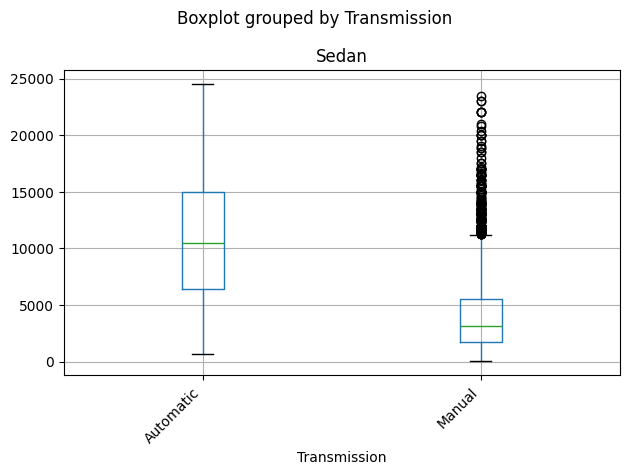

In [3619]:
sedan_filtered.boxplot(by ='Transmission', column ='Price(euro)', grid = True)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.title('Sedan')

Text(0.5, 1.0, 'Universal')

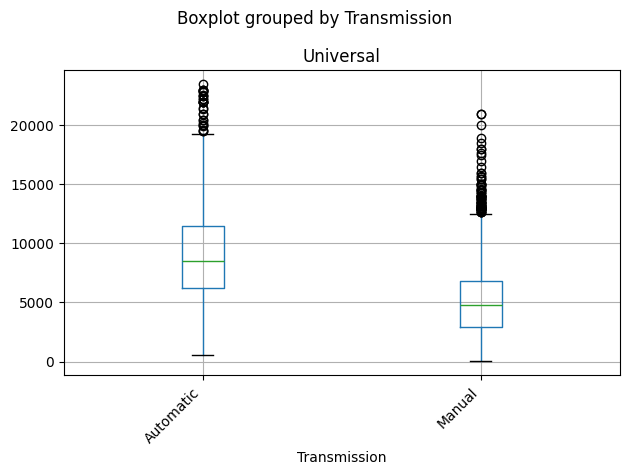

In [3620]:
universal_filtered.boxplot(by ='Transmission', column ='Price(euro)', grid = True)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.title('Universal')

Топливо и цена

In [3621]:
sedan_fuel = sedan['Fuel_type'].value_counts()
sedan_fuel_valid = sedan_fuel[sedan_fuel >= 50].index
sedan_fuel_filtered = sedan[sedan['Fuel_type'].isin(sedan_fuel_valid)]
sedan_fuel_filtered.Fuel_type.value_counts()

Fuel_type
Petrol            4006
Diesel            2549
Metan/Propan      1289
Hybrid             685
Plug-in Hybrid     133
Name: count, dtype: int64

In [3622]:
universal_fuel = universal['Fuel_type'].value_counts()
universal_fuel_valid = universal_fuel[universal_fuel >= 50].index
universal_fuel_filtered = universal[universal['Fuel_type'].isin(universal_fuel_valid)]
universal_fuel_filtered.Fuel_type.value_counts()

Fuel_type
Diesel          3775
Petrol          1520
Metan/Propan     690
Hybrid           180
Name: count, dtype: int64

Как для внедорожника, так и для седана, трансмиссия отображает все данные выше 50. Поэтому нет необходимости фильтровать данные.

Text(0.5, 1.0, 'Sedan')

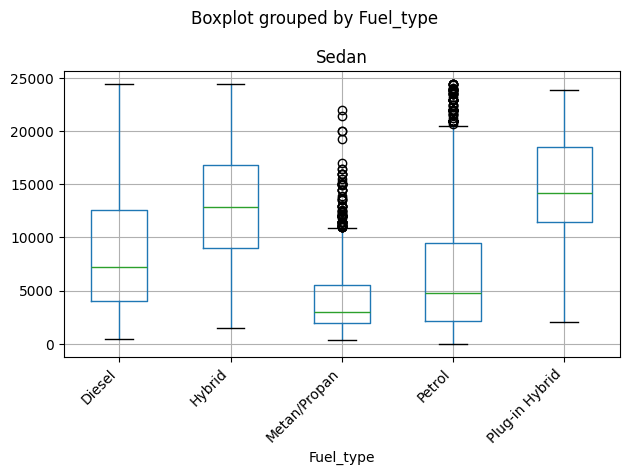

In [ ]:
sedan_fuel_filtered.boxplot(by='Fuel_type', column='Price(euro)', grid=True)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.title('Sedan')

Text(0.5, 1.0, 'Universal')

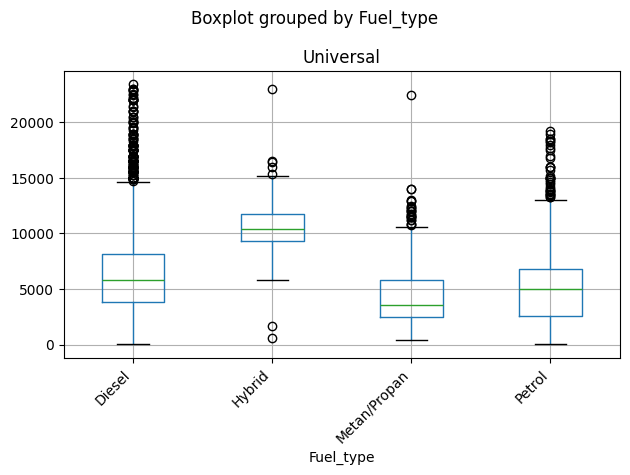

In [3626]:
universal_fuel_filtered.boxplot(by='Fuel_type', column='Price(euro)', grid=True)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.title('Universal')